In [1]:
import numpy as np
import pandas as pd

### EDA

#### read data

In [6]:
df = pd.read_csv('takehome_ds_written.csv', index_col=0)

In [7]:
df.head()

,merchant,time,amount_usd_in_cents
1,faa029c6b0,2034-06-17 23:34:14,6349
2,ed7a7d91aa,2034-12-27 00:40:38,3854
3,5608f200cf,2034-04-30 01:29:42,789
4,15b1a0d61e,2034-09-16 01:06:23,4452
5,4770051790,2034-07-22 16:21:42,20203


In [8]:
df.shape

(1513719, 3)

In [62]:
df.isna().any()

merchant               False
time                   False
amount_usd_in_cents    False
dtype: bool

In [14]:
df.time = df.time.apply(lambda x:pd.Timestamp(x))

In [15]:
df.head()

,merchant,time,amount_usd_in_cents
1,faa029c6b0,2034-06-17 23:34:14,6349
2,ed7a7d91aa,2034-12-27 00:40:38,3854
3,5608f200cf,2034-04-30 01:29:42,789
4,15b1a0d61e,2034-09-16 01:06:23,4452
5,4770051790,2034-07-22 16:21:42,20203


In [19]:
len(df.merchant.unique())

14351

#### aggregate merchants

In [58]:
num_trans = df.groupby('merchant')['time'].count().sort_values(ascending=False).to_frame('counts')


In [59]:
num_trans

,counts
merchant,
5608f200cf,25512
53b3fbeae2,12178
1ddaea9838,12042
89e2d29885,11969
654930c922,11222
...,...
69eff03b7e,1
69cbf327dd,1
69c5ae358e,1


In [60]:
num_trans.describe()

,counts
count,14351.000000
mean,105.478294
std,527.717966
min,1.000000
25%,3.000000
50%,11.000000
75%,45.000000
max,25512.000000


In [76]:
def agg_merchants(df):
    start =  df.groupby('merchant')['time'].min().to_frame('start time')
    end = df.groupby('merchant')['time'].max().to_frame('end time')
    counts = df.groupby('merchant')['time'].count().to_frame('counts')#.sort_values(ascending=False).to_frame('counts')
    results = start.join(end).join(counts)
    return results.sort_values('counts',ascending=False)

In [77]:
agg_mer = agg_merchants(df)

In [82]:
agg_mer.head()

,start time,end time,counts
merchant,,,
5608f200cf,2033-03-29 21:21:57,2034-12-31 04:44:54,25512
53b3fbeae2,2033-11-29 20:40:04,2034-12-31 06:13:56,12178
1ddaea9838,2033-01-03 15:16:32,2034-12-31 07:23:54,12042
89e2d29885,2033-01-25 21:56:56,2034-12-31 02:05:34,11969
654930c922,2033-01-11 19:03:11,2034-12-30 23:38:40,11222


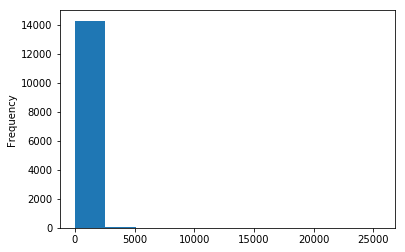

In [80]:
agg_mer.counts.plot.hist()

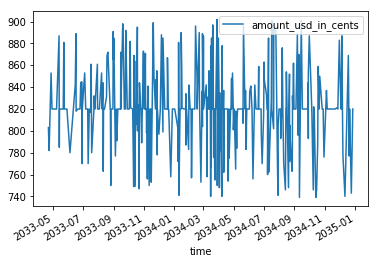

In [101]:
aa = df.set_index('merchant').loc['5608f200cf']
aa.sort_values('time')
aa.set_index('time')
aa[-400:].plot('time','amount_usd_in_cents')

In [94]:
aa.amount_usd_in_cents.describe()

count    25512.000000
mean       819.675878
std         33.842892
min        382.000000
25%        820.000000
50%        820.000000
75%        820.000000
max        902.000000
Name: amount_usd_in_cents, dtype: float64

In [98]:

aa.amount_usd_in_cents.unique()

array([789, 797, 820, 861, 841, 743, 901, 896, 819, 827, 890, 796, 804,
       897, 830, 787, 813, 748, 766, 784, 843, 757, 878, 806, 872, 798,
       869, 756, 885, 838, 888, 805, 891, 774, 785, 760, 777, 755, 821,
       808, 771, 833, 825, 876, 791, 862, 794, 783, 842, 779, 837, 793,
       746, 810, 800, 824, 868, 807, 851, 781, 758, 870, 879, 847, 894,
       759, 875, 767, 877, 892, 881, 790, 742, 778, 889, 761, 764, 765,
       740, 887, 849, 768, 898, 899, 751, 776, 902, 871, 782, 763, 762,
       893, 858, 754, 853, 859, 828, 812, 839, 850, 816, 802, 738, 852,
       882, 840, 739, 818, 817, 826, 880, 823, 836, 775, 855, 773, 741,
       860, 863, 753, 745, 815, 780, 747, 854, 750, 770, 792, 846, 865,
       744, 856, 811, 795, 844, 809, 831, 845, 832, 801, 867, 829, 857,
       834, 822, 873, 786, 866, 886, 883, 769, 864, 788, 752, 749, 848,
       884, 900, 803, 835, 895, 814, 772, 799, 874, 438, 434, 423, 444,
       382], dtype=int64)